In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

df1 = pd.read_csv('./data/Weather.csv', index_col='date', parse_dates=True, infer_datetime_format=True)
df2 = pd.read_csv('./data/SearchTrend.csv', index_col='date', parse_dates=True, infer_datetime_format=True)
df1 = df1[['avg_temp', 'min_temp', 'max_temp', 'precipitation', 'max_wind_speed', 'most_wind_direction', 'avg_relative_humidity']]
df1 = df1.groupby(by="date").mean()
df = df1.merge(df2, how="left", left_index=True, right_index=True).dropna()
df['cold'] = np.log(df['cold']/100)
df['flu'] = np.log(df['flu']/100)
df['pneumonia'] = np.log(df['pneumonia']/100)
df['coronavirus'] = np.log(df['coronavirus']/100)

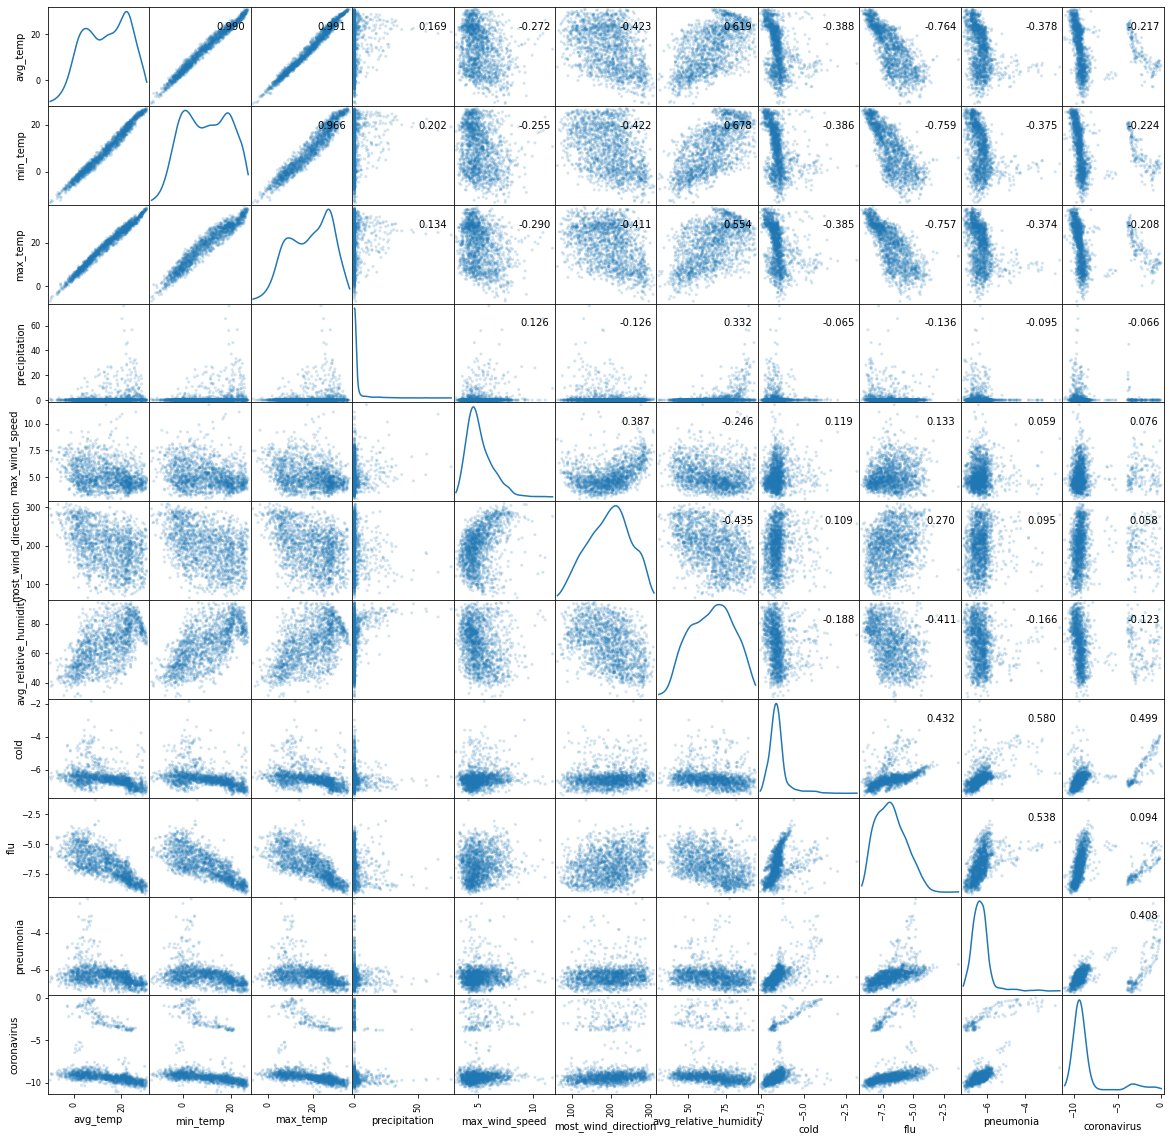

In [2]:
axes = scatter_matrix(df, alpha = 0.2, figsize = (20,20), diagonal = 'kde')
corr = df.corr().values # let's show correlations on each subplot
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')